# Preprocessing of the NRD data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [8]:
pd.set_option('display.expand_frame_repr', False)

In [2]:
%matplotlib inline

In [3]:
path = '/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/NRD/'

## Creating readmission labels
In this section we create two labels for each admission: (1) whether this admission is planned (2) whether this admission is followed by a 30-day readmission. This applies to admission with all DX1. 

Defining the variable(coloumn) names, data types, and missing values (these are extracted from the NRD SAS load programs):

In [4]:
core_cols = ['AGE', 'AWEEKEND', 'DIED', 'DISCWT', 'DISPUNIFORM', 'DMONTH', 'DQTR', 'DRG', 'DRGVER', 'DRG_NoPOA', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6', 'DX7', 'DX8', 'DX9', 'DX10', 'DX11', 'DX12', 'DX13', 'DX14', 'DX15', 'DX16', 'DX17', 'DX18', 'DX19', 'DX20', 'DX21', 'DX22', 'DX23', 'DX24', 'DX25', 'DX26', 'DX27', 'DX28', 'DX29', 'DX30', 'DXCCS1', 'DXCCS2', 'DXCCS3', 'DXCCS4', 'DXCCS5', 'DXCCS6', 'DXCCS7', 'DXCCS8', 'DXCCS9', 'DXCCS10', 'DXCCS11', 'DXCCS12', 'DXCCS13', 'DXCCS14', 'DXCCS15', 'DXCCS16', 'DXCCS17', 'DXCCS18', 'DXCCS19', 'DXCCS20', 'DXCCS21', 'DXCCS22', 'DXCCS23', 'DXCCS24', 'DXCCS25', 'DXCCS26', 'DXCCS27', 'DXCCS28', 'DXCCS29', 'DXCCS30', 'ECODE1', 'ECODE2', 'ECODE3', 'ECODE4', 'ELECTIVE', 'E_CCS1', 'E_CCS2', 'E_CCS3', 'E_CCS4', 'FEMALE', 'HCUP_ED', 'HOSP_NRD', 'KEY_NRD', 'LOS', 'MDC', 'MDC_NoPOA', 'NCHRONIC', 'NDX', 'NECODE', 'NPR', 'NRD_DaysToEvent', 'NRD_STRATUM', 'NRD_VisitLink', 'ORPROC', 'PAY1', 'PL_NCHS', 'PR1', 'PR2', 'PR3', 'PR4', 'PR5', 'PR6', 'PR7', 'PR8', 'PR9', 'PR10', 'PR11', 'PR12', 'PR13', 'PR14', 'PR15', 'PRCCS1', 'PRCCS2', 'PRCCS3', 'PRCCS4', 'PRCCS5', 'PRCCS6', 'PRCCS7', 'PRCCS8', 'PRCCS9', 'PRCCS10', 'PRCCS11', 'PRCCS12', 'PRCCS13', 'PRCCS14', 'PRCCS15', 'PRDAY1', 'PRDAY2', 'PRDAY3', 'PRDAY4', 'PRDAY5', 'PRDAY6', 'PRDAY7', 'PRDAY8', 'PRDAY9', 'PRDAY10', 'PRDAY11', 'PRDAY12', 'PRDAY13', 'PRDAY14', 'PRDAY15', 'REHABTRANSFER', 'RESIDENT', 'SAMEDAYEVENT', 'SERVICELINE', 'TOTCHG', 'YEAR', 'ZIPINC_QRTL']

core_labels = ['Age in years at admission', 'Admission day is a weekend', 'Died during hospitalization', 'Weight to discharges in AHA universe', 'Disposition of patient (uniform)', 'Discharge month', 'Discharge quarter', 'DRG in effect on discharge date', 'DRG grouper version used on discharge date', 'DRG in use on discharge date, calculated without POA', 'Diagnosis 1', 'Diagnosis 2', 'Diagnosis 3', 'Diagnosis 4', 'Diagnosis 5', 'Diagnosis 6', 'Diagnosis 7', 'Diagnosis 8', 'Diagnosis 9', 'Diagnosis 10', 'Diagnosis 11', 'Diagnosis 12', 'Diagnosis 13', 'Diagnosis 14', 'Diagnosis 15', 'Diagnosis 16', 'Diagnosis 17', 'Diagnosis 18', 'Diagnosis 19', 'Diagnosis 20', 'Diagnosis 21', 'Diagnosis 22', 'Diagnosis 23', 'Diagnosis 24', 'Diagnosis 25', 'Diagnosis 26', 'Diagnosis 27', 'Diagnosis 28', 'Diagnosis 29', 'Diagnosis 30', 'CCS: diagnosis 1', 'CCS: diagnosis 2', 'CCS: diagnosis 3', 'CCS: diagnosis 4', 'CCS: diagnosis 5', 'CCS: diagnosis 6', 'CCS: diagnosis 7', 'CCS: diagnosis 8', 'CCS: diagnosis 9', 'CCS: diagnosis 10', 'CCS: diagnosis 11', 'CCS: diagnosis 12', 'CCS: diagnosis 13', 'CCS: diagnosis 14', 'CCS: diagnosis 15', 'CCS: diagnosis 16', 'CCS: diagnosis 17', 'CCS: diagnosis 18', 'CCS: diagnosis 19', 'CCS: diagnosis 20', 'CCS: diagnosis 21', 'CCS: diagnosis 22', 'CCS: diagnosis 23', 'CCS: diagnosis 24', 'CCS: diagnosis 25', 'CCS: diagnosis 26', 'CCS: diagnosis 27', 'CCS: diagnosis 28', 'CCS: diagnosis 29', 'CCS: diagnosis 30', 'E code 1', 'E code 2', 'E code 3', 'E code 4', 'Elective versus non-elective admission', 'CCS: E Code 1', 'CCS: E Code 2', 'CCS: E Code 3', 'CCS: E Code 4', 'Indicator of sex', 'HCUP Emergency Department service indicator', 'NRD hospital identifier', 'NRD record identifier', 'Length of stay (cleaned)', 'MDC in effect on discharge date', 'MDC in use on discharge date, calculated without POA', 'Number of chronic conditions', 'Number of diagnoses on this record', 'Number of E codes on this record', 'Number of procedures on this record', 'Timing variable used to identify days between admissions', 'NRD stratum used for weighting', 'NRD visitlink', 'Major operating room procedure indicator', 'Primary expected payer (uniform)', 'Patient Location: NCHS Urban-Rural Code', 'Procedure 1', 'Procedure 2', 'Procedure 3', 'Procedure 4', 'Procedure 5', 'Procedure 6', 'Procedure 7', 'Procedure 8', 'Procedure 9', 'Procedure 10', 'Procedure 11', 'Procedure 12', 'Procedure 13', 'Procedure 14', 'Procedure 15', 'CCS: procedure 1', 'CCS: procedure 2', 'CCS: procedure 3', 'CCS: procedure 4', 'CCS: procedure 5', 'CCS: procedure 6', 'CCS: procedure 7', 'CCS: procedure 8', 'CCS: procedure 9', 'CCS: procedure 10', 'CCS: procedure 11', 'CCS: procedure 12', 'CCS: procedure 13', 'CCS: procedure 14', 'CCS: procedure 15', 'Number of days from admission to PR1', 'Number of days from admission to PR2', 'Number of days from admission to PR3', 'Number of days from admission to PR4', 'Number of days from admission to PR5', 'Number of days from admission to PR6', 'Number of days from admission to PR7', 'Number of days from admission to PR8', 'Number of days from admission to PR9', 'Number of days from admission to PR10', 'Number of days from admission to PR11', 'Number of days from admission to PR12', 'Number of days from admission to PR13', 'Number of days from admission to PR14', 'Number of days from admission to PR15', 'A combined record involving rehab transfer', 'Patient State is the same as Hospital State', 'Transfer flag indicating combination of discharges involve same day events', 'Hospital Service Line', 'Total charges (cleaned)', 'Calendar year', 'Median household income national quartile for patient ZIP Code']

core_dtypes_pd = {'AGE': float,
 'AWEEKEND': float,
 'DIED': float,
 'DISCWT': float,
 'DISPUNIFORM': float,
 'DMONTH': float,
 'DQTR': float,
 'DRG': float,
 'DRGVER': float,
 'DRG_NoPOA': float,
 'DX1': bytes,
 'DX10': bytes,
 'DX11': bytes,
 'DX12': bytes,
 'DX13': bytes,
 'DX14': bytes,
 'DX15': bytes,
 'DX16': bytes,
 'DX17': bytes,
 'DX18': bytes,
 'DX19': bytes,
 'DX2': bytes,
 'DX20': bytes,
 'DX21': bytes,
 'DX22': bytes,
 'DX23': bytes,
 'DX24': bytes,
 'DX25': bytes,
 'DX26': bytes,
 'DX27': bytes,
 'DX28': bytes,
 'DX29': bytes,
 'DX3': bytes,
 'DX30': bytes,
 'DX4': bytes,
 'DX5': bytes,
 'DX6': bytes,
 'DX7': bytes,
 'DX8': bytes,
 'DX9': bytes,
 'DXCCS1': float,
 'DXCCS10': float,
 'DXCCS11': float,
 'DXCCS12': float,
 'DXCCS13': float,
 'DXCCS14': float,
 'DXCCS15': float,
 'DXCCS16': float,
 'DXCCS17': float,
 'DXCCS18': float,
 'DXCCS19': float,
 'DXCCS2': float,
 'DXCCS20': float,
 'DXCCS21': float,
 'DXCCS22': float,
 'DXCCS23': float,
 'DXCCS24': float,
 'DXCCS25': float,
 'DXCCS26': float,
 'DXCCS27': float,
 'DXCCS28': float,
 'DXCCS29': float,
 'DXCCS3': float,
 'DXCCS30': float,
 'DXCCS4': float,
 'DXCCS5': float,
 'DXCCS6': float,
 'DXCCS7': float,
 'DXCCS8': float,
 'DXCCS9': float,
 'ECODE1': bytes,
 'ECODE2': bytes,
 'ECODE3': bytes,
 'ECODE4': bytes,
 'ELECTIVE': float,
 'E_CCS1': float,
 'E_CCS2': float,
 'E_CCS3': float,
 'E_CCS4': float,
 'FEMALE': float,
 'HCUP_ED': float,
 'HOSP_NRD': float,
 'KEY_NRD': float,
 'LOS': float,
 'MDC': float,
 'MDC_NoPOA': float,
 'NCHRONIC': float,
 'NDX': float,
 'NECODE': float,
 'NPR': float,
 'NRD_DaysToEvent': float,
 'NRD_STRATUM': float,
 'NRD_VisitLink': bytes,
 'ORPROC': float,
 'PAY1': float,
 'PL_NCHS': float,
 'PR1': bytes,
 'PR10': bytes,
 'PR11': bytes,
 'PR12': bytes,
 'PR13': bytes,
 'PR14': bytes,
 'PR15': bytes,
 'PR2': bytes,
 'PR3': bytes,
 'PR4': bytes,
 'PR5': bytes,
 'PR6': bytes,
 'PR7': bytes,
 'PR8': bytes,
 'PR9': bytes,
 'PRCCS1': float,
 'PRCCS10': float,
 'PRCCS11': float,
 'PRCCS12': float,
 'PRCCS13': float,
 'PRCCS14': float,
 'PRCCS15': float,
 'PRCCS2': float,
 'PRCCS3': float,
 'PRCCS4': float,
 'PRCCS5': float,
 'PRCCS6': float,
 'PRCCS7': float,
 'PRCCS8': float,
 'PRCCS9': float,
 'PRDAY1': float,
 'PRDAY10': float,
 'PRDAY11': float,
 'PRDAY12': float,
 'PRDAY13': float,
 'PRDAY14': float,
 'PRDAY15': float,
 'PRDAY2': float,
 'PRDAY3': float,
 'PRDAY4': float,
 'PRDAY5': float,
 'PRDAY6': float,
 'PRDAY7': float,
 'PRDAY8': float,
 'PRDAY9': float,
 'REHABTRANSFER': float,
 'RESIDENT': float,
 'SAMEDAYEVENT': bytes,
 'SERVICELINE': float,
 'TOTCHG': float,
 'YEAR': float,
 'ZIPINC_QRTL': float}

core_dtypes_sas = ['int', 'int', 'int', 'float', 'int', 'int', 'int', 'int', 'int', 'int', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'str', 'str', 'str', 'str', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'str', 'int', 'int', 'int', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'str', 'int', 'int', 'int', 'int']

core_dtypes_logic = ['continuous', 'categorical', 'categorical', 'continuous', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'embedding', 'embedding', 'embedding', 'embedding', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'continuous', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'continuous', 'categorical', 'embedding', 'categorical', 'categorical', 'categorical', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'embedding', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'categorical', 'categorical', 'categorical', 'categorical', 'continuous', 'categorical', 'categorical']

na_values = ['-9', '-8', '-6', '-5', '-99', '-88', '-66', '-999', '-888', '-666', '-9.9', '-8.8', '-6.6', '-9999', '-8888', '-6666', '-9.99', '-8.88', '-6.66', '-99999', '-88888', '-66666', '-99.99', '-88.88', '-66.66', '-999.99', '-888.88', '-666.66', '-9999999', '-8888888', '-6666666', '-9999.99', '-8888.88', '-6666.66', '-99.9999', '-88.8888', '-66.6666', '-999999999', '-888888888', '-666666666', '-9999.9999', '-8888.8888', '-6666.6666', '-999.99999', '-888.88888', '-666.66666', '-999999999', '-888888888', '-666666666', '-99.9999999', '-88.8888888', '-66.6666666', '-99999999.99', '-88888888.88', '-66666666.66', '-99999.99999', '-88888.88888', '-66666.66666', '-999999999999', '-888888888888', '-666666666666', '-99999999999.99', '-88888888888.88', '-66666666666.66']

In [5]:
core_var_lst = pd.DataFrame(dict(var=core_cols, label=core_labels, dtype_logic=core_dtypes_logic))

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(core_var_lst)

,dtype_logic,label,var
0,continuous,Age in years at admission,AGE
1,categorical,Admission day is a weekend,AWEEKEND
2,categorical,Died during hospitalization,DIED
3,continuous,Weight to discharges in AHA universe,DISCWT
4,categorical,Disposition of patient (uniform),DISPUNIFORM
5,categorical,Discharge month,DMONTH
6,categorical,Discharge quarter,DQTR
7,categorical,DRG in effect on discharge date,DRG
8,categorical,DRG grouper version used on discharge date,DRGVER
9,categorical,"DRG in use on discharge date, calculated witho...",DRG_NoPOA


Read the Core data file by chunks, and extract only the variables useful for label creation:

In [6]:
chunked = pd.read_table(path+'raw/2014/NRD_2014_Core.CSV', sep=',', 
                           header = None, 
                           names=core_cols, 
                           dtype=core_dtypes_pd, 
                           na_values=na_values, 
                           chunksize=10**6)

In [7]:
readm = pd.DataFrame()
chunk_id = 1
for chunk in chunked:
    readm1 = chunk[['KEY_NRD', 'NRD_VisitLink', 'NRD_DaysToEvent', 'LOS', 'PRCCS1', 'DXCCS1', 'PR1', 'DX1']]
    readm1 = readm1.dropna(subset=['NRD_DaysToEvent', 'LOS'])
    nrows = len(readm1)
    readm = pd.concat([readm, readm1])
    print('Chunk', chunk_id, 'finished:', nrows, 'rows are read.')
    chunk_id += 1

Chunk 1 finished: 999943 rows are read.
Chunk 2 finished: 999951 rows are read.
Chunk 3 finished: 999971 rows are read.
Chunk 4 finished: 999963 rows are read.
Chunk 5 finished: 999922 rows are read.
Chunk 6 finished: 999899 rows are read.
Chunk 7 finished: 999972 rows are read.
Chunk 8 finished: 999986 rows are read.
Chunk 9 finished: 999902 rows are read.
Chunk 10 finished: 999816 rows are read.
Chunk 11 finished: 999954 rows are read.
Chunk 12 finished: 999902 rows are read.
Chunk 13 finished: 999968 rows are read.
Chunk 14 finished: 999897 rows are read.
Chunk 15 finished: 894547 rows are read.


In [13]:
readm.to_csv(path+'temp/readmission_label.csv')

In [7]:
readm = pd.read_csv(path+'temp/readmission_label.csv', dtype = core_dtypes_pd, index_col=0)

/home/wsliu/.local/lib/python3.5/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [63]:
readm.tail()

,KEY_NRD,NRD_VisitLink,NRD_DaysToEvent,LOS,PRCCS1,DXCCS1,PR1,DX1
14894608,24880143.0,bye60ik,16646.0,1.0,NaN,657.0,NaN,29620
14894609,24887512.0,bylxy1a,13377.0,5.0,NaN,659.0,NaN,2989
14894610,24887821.0,bkes6v9,15272.0,2.0,NaN,659.0,NaN,2989
14894611,24890729.0,brsdnem,13832.0,5.0,NaN,657.0,NaN,29680
14894612,24893855.0,b0twdwx,17098.0,5.0,NaN,657.0,NaN,29690


Sort the data by patient id and then visiting day:

In [64]:
readm_sort = readm.sort_values(by=['NRD_VisitLink', 'NRD_DaysToEvent'])

In [17]:
sum(readm['PR1'].isna()), sum(readm['PRCCS1'].isna())

(5060677, 5088149)

Define the code sets for Planned Readmission Algorithm (from Page 103 of "Condition Specific Readmission Measures"):

In [66]:
tablePR1_PRCCS = set([64.0, 105.0, 134.0, 135.0, 176.0])

tablePR2_DXCCS = set([45., 194., 196., 254.])

tablePR3_PRCCS = set([1.0, 3.0, 5.0, 9.0, 10.0, 12.0, 33.0, 36.0, 38.0, 40.0, 43.0, 44.0, 45.0, 49.0, 51.0, 52.0, 53.0, 55.0, 56.0, 59.0, 66.0, 67.0, 74.0, 78.0, 79.0, 84.0, 85.0, 86.0, 99.0, 104.0, 106.0, 107.0, 109.0, 112.0, 113.0, 114.0, 119.0, 120.0, 124.0, 129.0, 132.0, 142.0, 152.0, 153.0, 154.0, 158.0, 159.0, 166.0, 167.0, 170.0, 172.0])

tablePR3_PR = set(['301', '3029', '303', '304', '3174', '346', '3818', '5503', '5504', '9426', '9427'])

tablePR4_DXCCS = set([1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 54.0, 55.0, 60.0, 61.0, 63.0, 76.0, 77.0, 78.0, 82.0, 83.0, 84.0, 85.0, 87.0, 89.0, 90.0, 91.0, 92.0, 93.0, 99.0, 100.0, 102.0, 104.0, 107.0, 109.0, 112.0, 116.0, 118.0, 120.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 135.0, 137.0, 139.0, 140.0, 142.0, 145.0, 146.0, 148.0, 153.0, 154.0, 157.0, 159.0, 165.0, 168.0, 172.0, 197.0, 198.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 232.0, 233.0, 234.0, 235.0, 237.0, 238.0, 239.0, 240.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 249.0, 250.0, 251.0, 252.0, 253.0, 259.0, 650.0, 651.0, 652.0, 653.0, 656.0, 658.0, 660.0, 661.0, 662.0, 663.0, 670.0])

tablePR4_DX = set(['03282', '03640', '03641', '03642', '03643', '07420', '07421', '07422', '07423', '11281', '11503', '11504', '11513', '11514', '11593', '11594', '1303', '3910', '3911', '3912', '3918', '3919', '3920', '3980', '39890', '39899', '4200', '42090', '42091', '42099', '4210', '4211', '4219', '4220', '42290', '42291', '42292', '42293', '42299', '4230', '4231', '4232', '4233', '4290', '42610', '42611', '42612', '42613', '4262', '4263', '4264', '42650', '42651', '42652', '42653', '4260', '42654', '4266', '4267', '42681', '42682', '4269', '42769', '42789', '4279', '7850', '4272', '4280', '4281', '42820', '42821', '42823', '42830', '42831', '42833', '42840', '42841', '42843', '4289', '39891', '57400', '57401', '57430', '57431', '57460', '57461', '57480', '57481', '5750', '57512', '5761', '5770'])

In [20]:
sum(readm['PRCCS1'].isin(tablePR1_PRCCS))/len(readm)

0.019567004415925692

Create the "planned" label: 1 for planned, 0 for unplanned: 

In [67]:
readm_sort['planned'] = readm_sort['PRCCS1'].isin(tablePR1_PRCCS) | readm_sort['DXCCS1'].isin(tablePR2_DXCCS) | ((readm_sort['PRCCS1'].isin(tablePR3_PRCCS) | readm_sort['PR1'].isin(tablePR3_PR)) & (~(readm_sort['DXCCS1'].isin(tablePR4_DXCCS) | readm_sort['DX1'].isin(tablePR4_DX))))

In [24]:
readm_sort['planned'].value_counts()

False    13413923
True      1479670
Name: planned, dtype: int64

Create a label whether this admission is a subsequent readmission following a planned admission:

In [69]:
planned = readm_sort.loc[readm_sort['planned']==True, ['NRD_VisitLink', 'NRD_DaysToEvent']]

In [71]:
patient_planned = set(planned['NRD_VisitLink'].unique())

In [72]:
sub_df = readm_sort.loc[readm_sort['NRD_VisitLink'].isin(patient_planned)]

In [74]:
patient_freq = sub_df['NRD_VisitLink'].value_counts()

In [75]:
sub_df = sub_df.loc[sub_df['NRD_VisitLink'].isin(patient_freq[patient_freq>1].index)]

In [78]:
sub_df['planned_subsequent'] = False

In [80]:
sub_df = sub_df.reset_index()

In [88]:
start = time.time()
pln_sub = False
j = 0
patient = sub_df.loc[j, 'NRD_VisitLink']
while j<len(sub_df):
    if pln_sub:
        if sub_df.loc[j, 'NRD_VisitLink'] == patient:
            sub_df.loc[j, 'planned_subsequent'] = True
        else:
            pln_sub = False
    if sub_df.loc[j, 'planned'] == True:
        patient = sub_df.loc[j, 'NRD_VisitLink']
        pln_sub = True
    j += 1
print(time.time()-start)

3234.76953125


In [92]:
key_subseq = set(sub_df.loc[sub_df['planned_subsequent'], 'KEY_NRD'].values)

In [97]:
readm_sort['planned_subseq'] = readm_sort['KEY_NRD'].isin(key_subseq)

Create the readmission label:

In [99]:
shifted = readm_sort[['NRD_VisitLink', 'NRD_DaysToEvent', 'planned', 'planned_subseq']].shift(periods=-1)

This label means whether this admission is followed by an unplanned readmission in this year:

In [100]:
readm_sort['readm'] = (readm_sort['NRD_VisitLink'] == shifted['NRD_VisitLink']) & (shifted['planned'] == False)

The next label means whether this admission is followed by an admission that is neither planned nor planned subseqent:

In [101]:
readm_sort['readm_nosubseq'] = (readm_sort['readm'] == True) & (shifted['planned_subseq'] == False)

In [106]:
pd.crosstab(index=readm_sort['readm'], columns=readm_sort['readm_nosubseq'], margins=True)

readm_nosubseq,False,True,All
readm,,,
False,11143020,0,11143020
True,221244,3529329,3750573
All,11364264,3529329,14893593


The next label means whether this admission is followed by an unplanned and not planned subsequent readmission within 30 days of discharge:

In [107]:
readm_sort['readm30'] = (readm_sort['readm_nosubseq'] == True) & (readm_sort['NRD_DaysToEvent'] + readm_sort['LOS'] + 30 > shifted['NRD_DaysToEvent'])

In [108]:
readm_sort['readm30'].value_counts()

False    13274845
True      1618748
Name: readm30, dtype: int64

In [110]:
readm_sort.to_csv(path+'cohorts/readmission_labels.csv')

In [111]:
readm_sort.head()

,KEY_NRD,NRD_VisitLink,NRD_DaysToEvent,LOS,PRCCS1,DXCCS1,PR1,DX1,planned,planned_subseq,readm,readm_nosubseq,readm30
6951241,13027615.0,b000029,15348.0,4.0,NaN,148.0,NaN,5679,False,False,False,False,False
8966686,17451462.0,b00008o,18763.0,3.0,NaN,218.0,NaN,V3001,False,False,False,False,False
9720510,15712009.0,b00009m,12287.0,6.0,216.0,59.0,9390,2809,False,False,True,True,True
9717438,11163602.0,b00009m,12308.0,2.0,NaN,108.0,NaN,42833,False,False,True,True,False
9721589,17233979.0,b00009m,12353.0,4.0,222.0,153.0,9904,53100,False,False,False,False,False


In [ ]:
readm_sort = pd.read_csv(path+'cohorts/readmssion_labels.csv', dtype=core_dtypes_pd, index_col=0)

## Creating Cohorts

In [33]:
chunked = pd.read_table(path+'raw/2014/NRD_2014_Core.CSV', sep=',', 
                           header = None, 
                           names=core_cols, 
                           dtype=core_dtypes_pd, 
                           na_values=na_values, 
                           chunksize=10**6)

The ICD9 diagnosis codes for the three conditions (from Devraj's paper):

In [48]:
ami_DX = ['41000', '41001', '41010', '41011', '41020', '41021', '41030', '41031', '41040', '41041', '41050', '41051', '41060', '41061', '41070', '41071', '41080', '41081', '41090', '41091']

In [42]:
chf_DX = ['40201', '40211', '40291', '40401', '40403', '40411', '40413', '40491', '40493', '4280', '4281', '4282', '42821', '42822', '42823', '4283', '42831', '42832', '42833', '4284', '42841', '42842', '42843', '4289']

In [44]:
pne_DX = ['4800', '4801', '4802', '4803', '4808', '4809', '4810', '4820', '4821', '4822', '4823', '48231', '48232', '48239', '4824', '48241', '48242', '48249', '48281', '48282', '48283', '48284', '48289', '4829', '4830', '4831', '4838', '4850', '4860', '4870', '48811']

Extract the rows that have DX1 of the three conditions:

In [45]:
ami = pd.DataFrame()
chf = pd.DataFrame()
pne = pd.DataFrame()

In [47]:
chunk_idx = 1
for chunk in chunked:
    ami1 = chunk.loc[chunk['DX1'].isin(ami_DX)]
    chf1 = chunk.loc[chunk['DX1'].isin(chf_DX)]
    pne1 = chunk.loc[chunk['DX1'].isin(pne_DX)]
    ami = pd.concat([ami, ami1], ignore_index=True)
    chf = pd.concat([chf, chf1], ignore_index=True)
    pne = pd.concat([pne, pne1], ignore_index=True)
    print('Chunk', chunk_idx, 'finished. Number of rows read: ami:', len(ami1), 'chf:', len(chf1), 'pne:', len(pne1))
    chunk_idx += 1

Chunk 1 finished. Number of rows read: ami: 18099 chf: 29055 pne: 4359
Chunk 2 finished. Number of rows read: ami: 18947 chf: 30928 pne: 3906
Chunk 3 finished. Number of rows read: ami: 17083 chf: 29934 pne: 4502
Chunk 4 finished. Number of rows read: ami: 14968 chf: 28558 pne: 4379
Chunk 5 finished. Number of rows read: ami: 17459 chf: 31693 pne: 4206
Chunk 6 finished. Number of rows read: ami: 18033 chf: 29730 pne: 4131
Chunk 7 finished. Number of rows read: ami: 16192 chf: 29521 pne: 4061
Chunk 8 finished. Number of rows read: ami: 17344 chf: 30254 pne: 4257
Chunk 9 finished. Number of rows read: ami: 17976 chf: 29186 pne: 4328
Chunk 10 finished. Number of rows read: ami: 16449 chf: 29432 pne: 3626
Chunk 11 finished. Number of rows read: ami: 15039 chf: 28444 pne: 3590
Chunk 12 finished. Number of rows read: ami: 18482 chf: 29122 pne: 4511
Chunk 13 finished. Number of rows read: ami: 18341 chf: 30342 pne: 4659
Chunk 14 finished. Number of rows read: ami: 18333 chf: 30731 pne: 4614
C

In [48]:
ami.shape, chf.shape, pne.shape

((258314, 148), (443392, 148), (62726, 148))

In [50]:
ami.to_csv(path+'cohorts/ami_core_2014.csv', index=False)
chf.to_csv(path+'cohorts/chf_core_2014.csv', index=False)
pne.to_csv(path+'cohorts/pne_core_2014.csv', index=False)

In [112]:
ami = pd.read_csv(path+'cohorts/ami_core_2014.csv', dtype=core_dtypes_pd)

Add the readmission labels to the AMI cohort.  

In [114]:
ami_label = pd.merge(ami, readm_sort[['KEY_NRD', 'planned', 'planned_subseq', 'readm30']], on='KEY_NRD')

Apply the excluding criteria to the AMI cohort: discharge in December, died in hospital, left against medical advice:

In [115]:
ami_label = ami_label[(ami_label['DMONTH']!=12) & (ami_label['DIED']==0) & (ami_label['DISPUNIFORM']!=7)]

The pecentage of missing length of stay, missing total charge, missing income quantile by zip code are not large:

In [59]:
sum(ami_label['LOS']==0)/len(ami_label)

0.010279188974726147

In [61]:
sum(ami_label['TOTCHG'].isna())/len(ami_label), sum(ami_label['ZIPINC_QRTL'].isna())/len(ami_label)

(0.028666806519577887, 0.01776283986537637)

So exclude them: 

In [116]:
ami_label = ami_label[(ami_label['LOS']!=0) & (~ami_label['TOTCHG'].isna()) & (~ami_label['ZIPINC_QRTL'].isna())]

In [118]:
ami_label['planned'].value_counts()

False    207149
Name: planned, dtype: int64

In [119]:
ami_label['planned_subseq'].value_counts()

False    205544
True       1605
Name: planned_subseq, dtype: int64

Remove the admission that is a subsequent of a planned admission:

In [120]:
ami_label = ami_label[ami_label['planned_subseq'] == False]

In [121]:
ami_label = ami_label.sort_values(by=['NRD_VisitLink', 'NRD_DaysToEvent'])

In [122]:
shifted = ami_label[['NRD_VisitLink', 'NRD_DaysToEvent', 'LOS', 'DX1']].shift()

Label the following admission as NOT index admission: it has a previous admission in this year with the same DX1 and it's within 30 days of the discharge of the last admission:

In [123]:
ami_label['index_adm'] = ~((ami_label['NRD_VisitLink'] == shifted['NRD_VisitLink']) & (ami_label['DX1']==shifted['DX1']) & (ami_label['NRD_DaysToEvent']<shifted['NRD_DaysToEvent']+shifted['LOS']+30))

In [124]:
ami_label['index_adm'].value_counts()

True     203409
False      2135
Name: index_adm, dtype: int64

In [125]:
ami_label = ami_label.loc[ami_label['index_adm']==True].drop(columns=['index_adm'])

In [12]:
ami_label = ami_label[ami_label['AGE']>=18]

Remove the hospitals with less than 10 admissions for either elder patients (>=65 years old) or younger patients (18-64 years old):

In [13]:
elder_freq = ami_label.loc[ami_label['AGE']>=65, 'HOSP_NRD'].value_counts()

In [14]:
ami_label = ami_label[~ami_label['HOSP_NRD'].isin(elder_freq[elder_freq<10].index)]

In [15]:
younger_freq = ami_label.loc[ami_label['AGE']<=64, 'HOSP_NRD'].value_counts()

In [16]:
ami_label = ami_label[~ami_label['HOSP_NRD'].isin(younger_freq[younger_freq<10].index)]

In [17]:
ami_label.shape

(196283, 151)

In [18]:
ami_label['readm30'].value_counts()

False    169856
True      26427
Name: readm30, dtype: int64

In [19]:
ami_label['DISPUNIFORM'].value_counts()

1.0     142626
6.0      26741
5.0      22822
2.0       3991
99.0       103
Name: DISPUNIFORM, dtype: int64

In [20]:
len(ami_label['HOSP_NRD'].unique())

898

In [25]:
sum(ami_label['AGE']>64)

108250

In [21]:
routine = ami_label[ami_label['DISPUNIFORM'] != 6]

In [22]:
routine['readm30'].value_counts()

False    148328
True      21214
Name: readm30, dtype: int64

In [23]:
len(routine['HOSP_NRD'].unique())

898

In [24]:
routine.shape

(169542, 151)

In [26]:
ami_label.to_csv(path+'cohorts/ami_index.csv', index=False)

In [7]:
ami_label = pd.read_csv(path+'cohorts/ami_index.csv', dtype=core_dtypes_pd)

In [14]:
ami_label.head()

,AGE,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DMONTH,DQTR,DRG,DRGVER,DRG_NoPOA,...,RESIDENT,SAMEDAYEVENT,SERVICELINE,TOTCHG,YEAR,ZIPINC_QRTL,planned,readm,readm30,index_adm
0,89.0,1.0,0.0,2.833704,2.0,7.0,3.0,280.0,31.0,280.0,...,1.0,4,5.0,64660.0,2014.0,1.0,False,True,True,True
1,65.0,0.0,0.0,2.046126,6.0,1.0,1.0,249.0,31.0,249.0,...,1.0,0,4.0,36915.0,2014.0,3.0,False,True,False,True
2,72.0,0.0,0.0,1.435778,1.0,10.0,4.0,280.0,32.0,280.0,...,1.0,0,5.0,125222.0,2014.0,2.0,False,False,False,True
3,57.0,0.0,0.0,2.308072,1.0,11.0,4.0,282.0,32.0,282.0,...,1.0,0,5.0,47257.0,2014.0,4.0,False,False,False,True
4,61.0,0.0,0.0,5.119861,1.0,11.0,4.0,247.0,32.0,247.0,...,1.0,0,4.0,55842.0,2014.0,1.0,False,False,False,True


### Summary Stats for Diagnosis Codes

In [27]:
DX_lst = ['DX'+str(n) for n in range(1,31)]

In [28]:
missing_pct = [ami_label[DX].isnull().sum()/len(ami_label) for DX in DX_lst]

In [29]:
for DX, pct in zip(DX_lst, missing_pct):
    print(DX, '\t', '{:.3f}'.format(pct))

DX1 	 0.000
DX2 	 0.001
DX3 	 0.005
DX4 	 0.019
DX5 	 0.047
DX6 	 0.093
DX7 	 0.150
DX8 	 0.215
DX9 	 0.287
DX10 	 0.381
DX11 	 0.443
DX12 	 0.502
DX13 	 0.557
DX14 	 0.606
DX15 	 0.654
DX16 	 0.717
DX17 	 0.752
DX18 	 0.783
DX19 	 0.847
DX20 	 0.867
DX21 	 0.886
DX22 	 0.902
DX23 	 0.916
DX24 	 0.928
DX25 	 0.939
DX26 	 0.961
DX27 	 0.966
DX28 	 0.971
DX29 	 0.975
DX30 	 0.979


In [30]:
DX_number = 30 - ami_label[DX_lst].isna().apply(sum, axis=1)

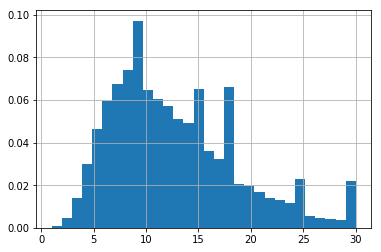

In [31]:
DX_number.hist(bins=30, density=1)

In [32]:
ami_label[DX_lst].nunique(dropna=False)

DX1       20
DX2     2698
DX3     2603
DX4     2712
DX5     2825
DX6     2775
DX7     2708
DX8     2651
DX9     2677
DX10    2443
DX11    2445
DX12    2370
DX13    2261
DX14    2188
DX15    2104
DX16    1959
DX17    1997
DX18    1912
DX19    1618
DX20    1568
DX21    1494
DX22    1477
DX23    1394
DX24    1075
DX25    1185
DX26    1060
DX27     996
DX28     968
DX29     852
DX30     818
dtype: int64

In [33]:
pd.concat([ami_label[DX] for DX in DX_lst]).nunique()

5487

In [35]:
DX_freq = pd.concat([ami_label[DX] for DX in DX_lst]).value_counts()

In [36]:
sum(DX_freq > 10)

2429

## Create the input data for prediction with comorbidities

In [5]:
severity_cols = ['APRDRG', 'APRDRG_Risk_Mortality', 'APRDRG_Severity', 'CM_AIDS',
       'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF',
       'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG',
       'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS',
       'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH',
       'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE',
       'CM_WGHTLOSS', 'HOSP_NRD', 'KEY_NRD']

severity_labels = ['All Patient Refined DRG', 'All Patient Refined DRG: Risk of Mortality Subclass', 'All Patient Refined DRG: Severity of Illness Subclass', 'AHRQ comorbidity measure: Acquired immune deficiency syndrome', 'AHRQ comorbidity measure: Alcohol abuse', 'AHRQ comorbidity measure: Deficiency anemias', 'AHRQ comorbidity measure: Rheumatoid arthritis/collagen vascular diseases', 'AHRQ comorbidity measure: Chronic blood loss anemia', 'AHRQ comorbidity measure: Congestive heart failure', 'AHRQ comorbidity measure: Chronic pulmonary disease', 'AHRQ comorbidity measure: Coagulopathy', 'AHRQ comorbidity measure: Depression', 'AHRQ comorbidity measure: Diabetes, uncomplicated', 'AHRQ comorbidity measure: Diabetes with chronic complications', 'AHRQ comorbidity measure: Drug abuse', 'AHRQ comorbidity measure: Hypertension (combine uncomplicated and complicated)', 'AHRQ comorbidity measure: Hypothyroidism', 'AHRQ comorbidity measure: Liver disease', 'AHRQ comorbidity measure: Lymphoma', 'AHRQ comorbidity measure: Fluid and electrolyte disorders', 'AHRQ comorbidity measure: Metastatic cancer', 'AHRQ comorbidity measure: Other neurological disorders', 'AHRQ comorbidity measure: Obesity', 'AHRQ comorbidity measure: Paralysis', 'AHRQ comorbidity measure: Peripheral vascular disorders', 'AHRQ comorbidity measure: Psychoses', 'AHRQ comorbidity measure: Pulmonary circulation disorders', 'AHRQ comorbidity measure: Renal failure', 'AHRQ comorbidity measure: Solid tumor without metastasis', 'AHRQ comorbidity measure: Peptic ulcer disease excluding bleeding', 'AHRQ comorbidity measure: Valvular disease', 'AHRQ comorbidity measure: Weight loss', 'NRD hospital identifier', 'NRD record identifier']

severity_dtypes_pd = dict(zip(severity_cols, [float]*len(severity_cols)))

In [6]:
severity = pd.read_table(path+'raw/2014/NRD_2014_Severity.CSV', sep=',', 
                           header = None, 
                           names=severity_cols, 
                           dtype=severity_dtypes_pd, 
                           na_values=na_values)

In [69]:
severity.shape

(14894613, 34)

In [8]:
ami_severity = severity.loc[severity['KEY_NRD'].isin(ami_label['KEY_NRD'])]

In [71]:
ami_severity.shape

(196283, 34)

In [9]:
comorb = [n for n in severity_cols if n.startswith('CM')]

In [10]:
comorb_df = pd.merge(ami_severity[comorb+['KEY_NRD']], ami_label[['AGE', 'FEMALE', 'HOSP_NRD', 'KEY_NRD', 'NRD_VisitLink', 'NRD_DaysToEvent', 'readm30']], on='KEY_NRD')

In [11]:
comorb_df.shape

(196283, 36)

In [12]:
comorb_df.to_csv(path+'cohorts/comorbidities.csv', index=False)

Distribution of number of comorbidities for each admission:

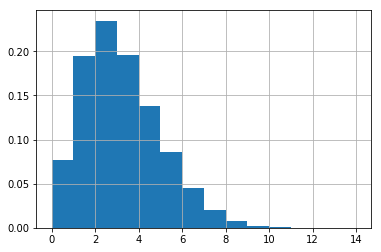

In [13]:
comorb_df[comorb].apply(sum, axis=1).hist(bins=14, density=1)

### backups

In [67]:
severity2014 = pd.read_sas(path+'sas/nrd_severity_2014.sas7bdat', chunksize=10**6)

In [75]:
core2014 = pd.read_sas(path+'sas/nrd_core_2014.sas7bdat', chunksize=10000)

In [72]:
dxpr2014 = pd.read_sas(path+'sas/nrd_dx_pr_grps_2014.sas7bdat', chunksize=1000)

In [61]:
core_dtypes_logic[core_cols.index('TOTCHG')] = 'continuous'

In [40]:
ami['PRDAY1'].describe()

count    220134.000000
mean          1.175638
std           2.641674
min          -4.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         365.000000
Name: PRDAY1, dtype: float64

In [64]:
ami['ZIPINC_QRTL'].value_counts(dropna=False)

 1.0    72043
 2.0    70457
 3.0    59103
 4.0    52113
NaN      4598
Name: ZIPINC_QRTL, dtype: int64

In [62]:
for c, l, t in zip(core_cols, core_labels, core_dtypes_logic):
    print(c, '\t', l, '\t', t)

AGE 	 Age in years at admission 	 continuous
AWEEKEND 	 Admission day is a weekend 	 categorical
DIED 	 Died during hospitalization 	 categorical
DISCWT 	 Weight to discharges in AHA universe 	 continuous
DISPUNIFORM 	 Disposition of patient (uniform) 	 categorical
DMONTH 	 Discharge month 	 categorical
DQTR 	 Discharge quarter 	 categorical
DRG 	 DRG in effect on discharge date 	 categorical
DRGVER 	 DRG grouper version used on discharge date 	 categorical
DRG_NoPOA 	 DRG in use on discharge date, calculated without POA 	 categorical
DX1 	 Diagnosis 1 	 embedding
DX2 	 Diagnosis 2 	 embedding
DX3 	 Diagnosis 3 	 embedding
DX4 	 Diagnosis 4 	 embedding
DX5 	 Diagnosis 5 	 embedding
DX6 	 Diagnosis 6 	 embedding
DX7 	 Diagnosis 7 	 embedding
DX8 	 Diagnosis 8 	 embedding
DX9 	 Diagnosis 9 	 embedding
DX10 	 Diagnosis 10 	 embedding
DX11 	 Diagnosis 11 	 embedding
DX12 	 Diagnosis 12 	 embedding
DX13 	 Diagnosis 13 	 embedding
DX14 	 Diagnosis 14 	 embedding
DX15 	 Diagnosis 15 	 embeddi

In [76]:
tp = pd.read_table(path+'raw/2014/NRD_2014_Core.CSV', sep=',', header = None, 
                   names=core_cols, 
                   dtype=core_dtypes_pd, 
                   na_values=na_values, 
                   nrows=10000)

In [74]:
tp.loc[0, 'NRD_VisitLink'].__class__

str

In [77]:
tp['NRD_VisitLink'].value_counts()

bq0ivdm    8
bd7sf9o    7
bb6zlby    7
bh5fc2g    7
bcpto4z    7
buyk71a    6
bjagp99    6
bz97xnp    6
brhagd0    6
bg2ujnd    6
bhgskl9    6
b8fxpz2    5
bxlrxzo    5
b58jnnq    5
bvfn06u    5
bhjsyqa    5
b3nuql6    5
bt3x8lx    5
b7szrg1    5
bvgjvnd    5
bctct34    5
byop16g    5
btrwx4s    5
b38qqqt    5
bt7zpif    5
b82nadi    5
b01tq9e    4
byn8ymi    4
b9kuln6    4
bpgzn55    4
          ..
bjp2em2    1
b6inune    1
blnzi69    1
bbit9yd    1
bmi4mf2    1
b0qdx6f    1
b0d104x    1
bc21n31    1
b13u6fh    1
bztyzjo    1
bpl5go1    1
bc10htc    1
b811qd8    1
brxbnjj    1
bzlctcf    1
bb1pn70    1
b0dnv2m    1
bw0sdmi    1
bnwqcjc    1
bctnewk    1
ba2vswi    1
b5npdio    1
bfv6yp8    1
bzgpdl8    1
bl986io    1
b0eojfk    1
b3ei09k    1
bbqnt69    1
bqp1nd7    1
bsx7wau    1
Name: NRD_VisitLink, Length: 8932, dtype: int64

In [78]:
chunk1 = next(core2014)

In [79]:
chunk1['NRD_VisitLink'].value_counts()

b'bq0ivdm'    8
b'bd7sf9o'    7
b'bb6zlby'    7
b'bh5fc2g'    7
b'bcpto4z'    7
b'buyk71a'    6
b'bjagp99'    6
b'bz97xnp'    6
b'brhagd0'    6
b'bg2ujnd'    6
b'bhgskl9'    6
b'b8fxpz2'    5
b'bxlrxzo'    5
b'b58jnnq'    5
b'bvfn06u'    5
b'bhjsyqa'    5
b'b3nuql6'    5
b'bt3x8lx'    5
b'b7szrg1'    5
b'bvgjvnd'    5
b'bctct34'    5
b'byop16g'    5
b'btrwx4s'    5
b'b38qqqt'    5
b'bt7zpif'    5
b'b82nadi'    5
b'b01tq9e'    4
b'byn8ymi'    4
b'b9kuln6'    4
b'bpgzn55'    4
             ..
b'bjp2em2'    1
b'b6inune'    1
b'blnzi69'    1
b'bbit9yd'    1
b'bmi4mf2'    1
b'b0qdx6f'    1
b'b0d104x'    1
b'bc21n31'    1
b'b13u6fh'    1
b'bztyzjo'    1
b'bpl5go1'    1
b'bc10htc'    1
b'b811qd8'    1
b'brxbnjj'    1
b'bzlctcf'    1
b'bb1pn70'    1
b'b0dnv2m'    1
b'bw0sdmi'    1
b'bnwqcjc'    1
b'bctnewk'    1
b'ba2vswi'    1
b'b5npdio'    1
b'bfv6yp8'    1
b'bzgpdl8'    1
b'bl986io'    1
b'b0eojfk'    1
b'b3ei09k'    1
b'bbqnt69'    1
b'bqp1nd7'    1
b'bsx7wau'    1
Name: NRD_VisitLink, Len

In [77]:
chunk1['PRMCCS1'].value_counts()

b'16.26.04'    89
b'13.08.04'    77
b'16.42.04'    52
b'16.26.02'    49
b'13.05.03'    47
b'13.07'       43
b'16.14.02'    28
b'13.02'       26
b'12.03'       21
b'16.26.01'    21
b'16.37'       19
b'16.33'       18
b'09.12'       15
b'13.05.04'    14
b'07.16'       12
b'07.12.03'    11
b'10.10'       11
b'13.09'        9
b'09.16.02'     9
b'09.18.04'     8
b'09.22'        8
b'15.05'        7
b'15.02'        6
b'16.26.03'     6
b'13.05.02'     5
b'09.30'        4
b'16.32'        4
b'09.08.02'     4
b'13.03.03'     4
b'12.04'        4
               ..
b'03.07'        1
b'09.13'        1
b'09.19'        1
b'10.03'        1
b'09.06'        1
b'13.04.01'     1
b'01.08'        1
b'16.06'        1
b'11.05'        1
b'16.14.06'     1
b'09.08.01'     1
b'02.01'        1
b'09.28.04'     1
b'12.06'        1
b'06.04.02'     1
b'09.21'        1
b'09.03'        1
b'13.04.02'     1
b'10.01.03'     1
b'01.02'        1
b'09.31.05'     1
b'05.06.02'     1
b'05.03'        1
b'09.18.02'     1
b'10.07'  

In [26]:
len(chuck1['NRD_VisitLink'].unique())

794315